# Explore here

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
# Load the training and test datasets
train_df = pd.read_csv('/workspaces/ML-web-app-using-Flask/models/TRAIN.csv')

# Display the first few rows of the training data
print(train_df.head())


         ID  Store_id Store_Type Location_Type Region_Code        Date  \
0  T1000001         1         S1            L3          R1  2018-01-01   
1  T1000002       253         S4            L2          R1  2018-01-01   
2  T1000003       252         S3            L2          R1  2018-01-01   
3  T1000004       251         S2            L3          R1  2018-01-01   
4  T1000005       250         S2            L3          R4  2018-01-01   

   Holiday Discount  #Order     Sales  
0        1      Yes       9   7011.84  
1        1      Yes      60  51789.12  
2        1      Yes      42  36868.20  
3        1      Yes      23  19715.16  
4        1      Yes      62  45614.52  


In [3]:
train_df.isnull().sum()

ID               0
Store_id         0
Store_Type       0
Location_Type    0
Region_Code      0
Date             0
Holiday          0
Discount         0
#Order           0
Sales            0
dtype: int64

In [4]:
train_df.shape

(188340, 10)

In [5]:
train_df.describe()

,Store_id,Holiday,#Order,Sales
count,188340.000000,188340.000000,188340.000000,188340.000000
mean,183.000000,0.131783,68.205692,42784.327982
std,105.366308,0.338256,30.467415,18456.708302
min,1.000000,0.000000,0.000000,0.000000
25%,92.000000,0.000000,48.000000,30426.000000
50%,183.000000,0.000000,63.000000,39678.000000
75%,274.000000,0.000000,82.000000,51909.000000
max,365.000000,1.000000,371.000000,247215.000000


In [6]:
# Basic info about the dataset
print(train_df.info())

# Statistical summary
print(train_df.describe())

# Check for missing values
print(train_df.isnull().sum())

# Visualizing the distribution of sales
plt.figure(figsize=(10, 6))
sns.histplot(train_df['sales'], kde=True)
plt.title('Distribution of Sales')
plt.show()

# Correlation matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(train_df.corr(), annot=True, fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188340 entries, 0 to 188339
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   ID             188340 non-null  object 
 1   Store_id       188340 non-null  int64  
 2   Store_Type     188340 non-null  object 
 3   Location_Type  188340 non-null  object 
 4   Region_Code    188340 non-null  object 
 5   Date           188340 non-null  object 
 6   Holiday        188340 non-null  int64  
 7   Discount       188340 non-null  object 
 8   #Order         188340 non-null  int64  
 9   Sales          188340 non-null  float64
dtypes: float64(1), int64(3), object(6)
memory usage: 14.4+ MB
None
            Store_id        Holiday         #Order          Sales
count  188340.000000  188340.000000  188340.000000  188340.000000
mean      183.000000       0.131783      68.205692   42784.327982
std       105.366308       0.338256      30.467415   18456.708302
min         1.000

KeyError: 'sales'

<Figure size 1000x600 with 0 Axes>

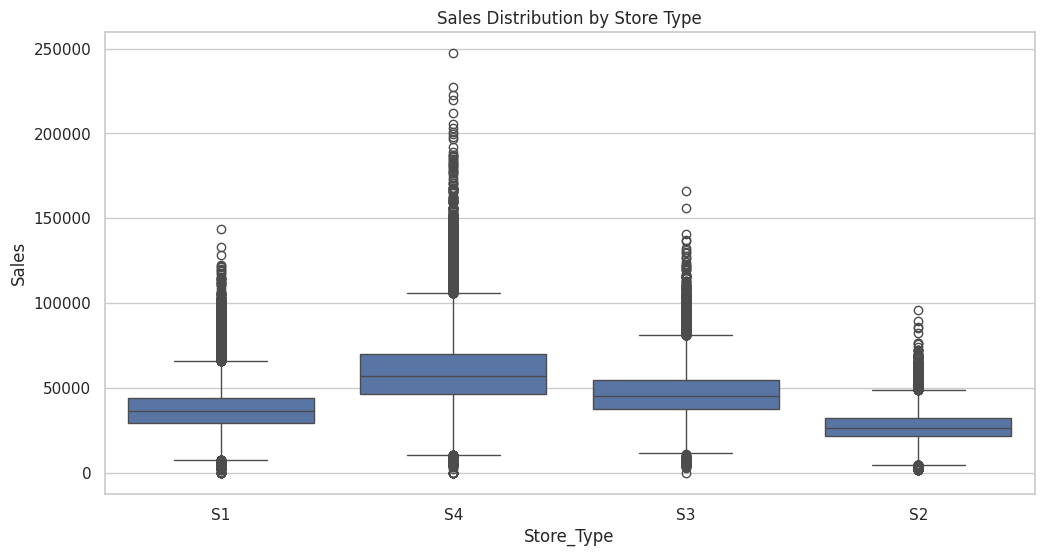

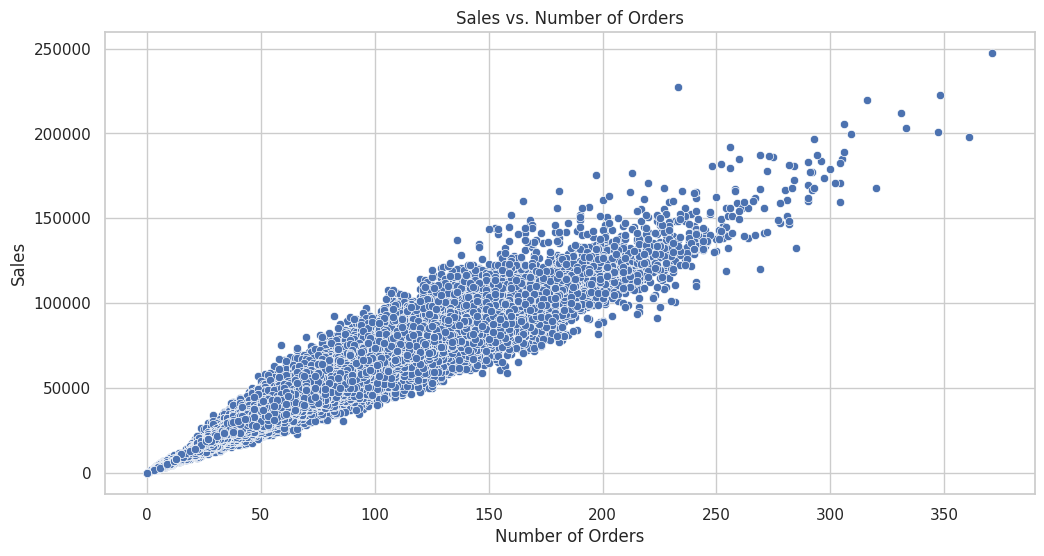

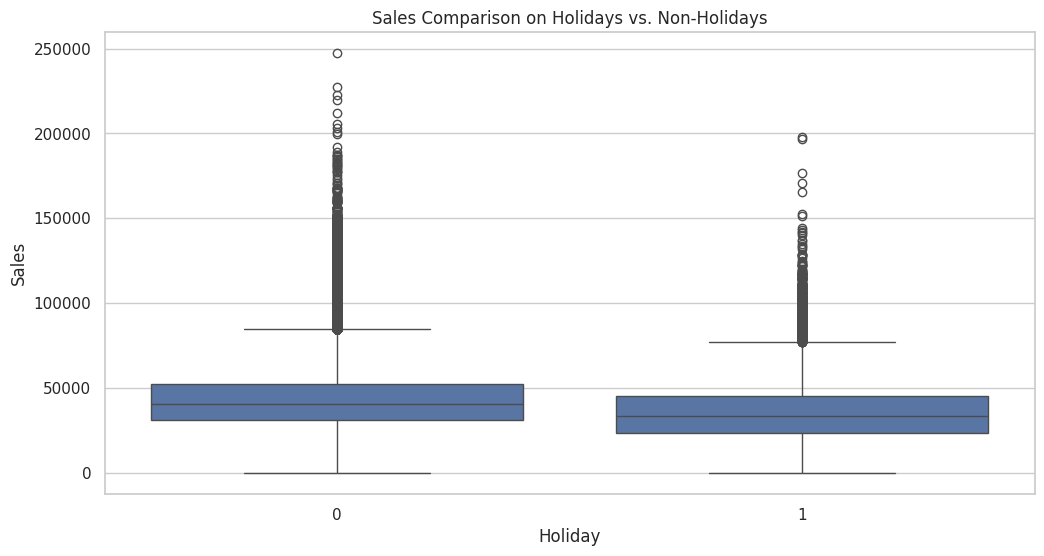

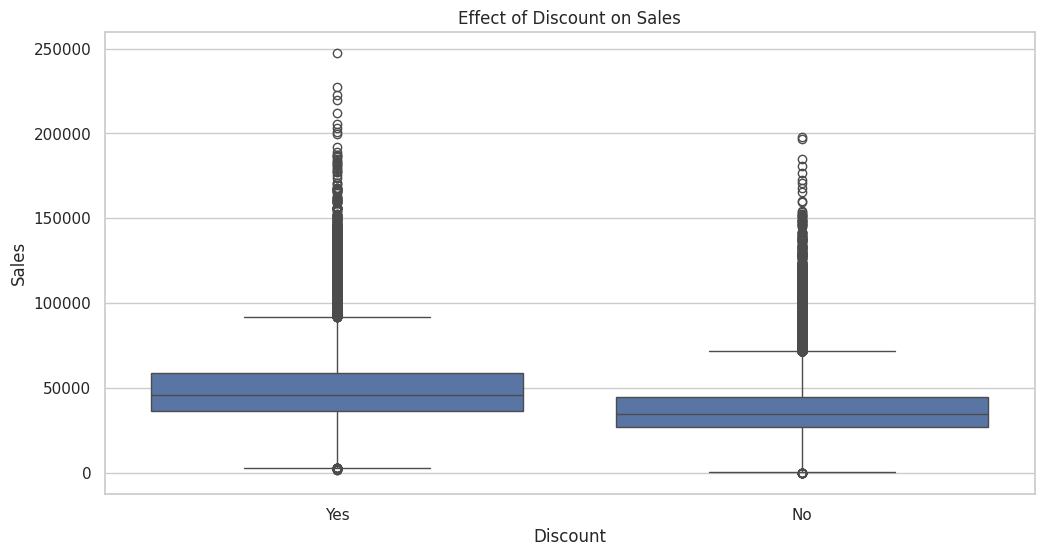

In [7]:
# Setting up the aesthetic style of the plots
sns.set(style="whitegrid")

# Sales distribution by Store Type
plt.figure(figsize=(12, 6))
sns.boxplot(x='Store_Type', y='Sales', data=train_df)
plt.title('Sales Distribution by Store Type')
plt.show()

# Sales vs. Number of Orders
plt.figure(figsize=(12, 6))
sns.scatterplot(x='#Order', y='Sales', data=train_df)
plt.title('Sales vs. Number of Orders')
plt.xlabel('Number of Orders')
plt.ylabel('Sales')
plt.show()

# Sales on Holidays vs. Non-holidays
plt.figure(figsize=(12, 6))
sns.boxplot(x='Holiday', y='Sales', data=train_df)
plt.title('Sales Comparison on Holidays vs. Non-Holidays')
plt.show()

# Effect of Discount on Sales
plt.figure(figsize=(12, 6))
sns.boxplot(x='Discount', y='Sales', data=train_df)
plt.title('Effect of Discount on Sales')
plt.show()


In [8]:
# Convert 'Date' to datetime
train_df['Date'] = pd.to_datetime(train_df['Date'])

# Extract day of the week and month from 'Date'
train_df['Day_of_Week'] = train_df['Date'].dt.dayofweek
train_df['Month'] = train_df['Date'].dt.month


# One-hot encoding for categorical variables
train_df = pd.get_dummies(train_df, columns=['Store_Type', 'Location_Type', 'Region_Code', 'Discount'])



In [11]:
print(train_df.columns)

Index(['ID', 'Store_id', 'Store_Type', 'Location_Type', 'Region_Code', 'Date',
       'Holiday', 'Discount', '#Order', 'Sales'],
      dtype='object')


In [12]:
train_df = pd.read_csv('/workspaces/ML-web-app-using-Flask/models/TRAIN.csv')
print(train_df.columns)  # Verify columns immediately after loading


Index(['ID', 'Store_id', 'Store_Type', 'Location_Type', 'Region_Code', 'Date',
       'Holiday', 'Discount', '#Order', 'Sales'],
      dtype='object')


In [14]:
# Reload the data just to be completely sure
train_df = pd.read_csv('/workspaces/ML-web-app-using-Flask/models/TRAIN.csv')

# Display the columns to double-check
print("Columns in the DataFrame:", train_df.columns)

# Process date and categorial features
train_df['Date'] = pd.to_datetime(train_df['Date'])
train_df['Day_of_Week'] = train_df['Date'].dt.dayofweek
train_df['Month'] = train_df['Date'].dt.month

# One-hot encode categorical variables
train_df = pd.get_dummies(train_df, columns=['Store_Type', 'Location_Type', 'Region_Code', 'Discount'])

# Ensure no column is dropped unintentionally
print("Columns after processing:", train_df.columns)


Columns in the DataFrame: Index(['ID', 'Store_id', 'Store_Type', 'Location_Type', 'Region_Code', 'Date',
       'Holiday', 'Discount', '#Order', 'Sales'],
      dtype='object')
Columns after processing: Index(['ID', 'Store_id', 'Date', 'Holiday', '#Order', 'Sales', 'Day_of_Week',
       'Month', 'Store_Type_S1', 'Store_Type_S2', 'Store_Type_S3',
       'Store_Type_S4', 'Location_Type_L1', 'Location_Type_L2',
       'Location_Type_L3', 'Location_Type_L4', 'Location_Type_L5',
       'Region_Code_R1', 'Region_Code_R2', 'Region_Code_R3', 'Region_Code_R4',
       'Discount_No', 'Discount_Yes'],
      dtype='object')


In [15]:
X_train = train_df.drop(['Sales', 'Date', 'ID'], axis=1)  # Features
y_train = train_df['Sales']  # Target variable
print("Feature columns used:", X_train.columns)


Feature columns used: Index(['Store_id', 'Holiday', '#Order', 'Day_of_Week', 'Month',
       'Store_Type_S1', 'Store_Type_S2', 'Store_Type_S3', 'Store_Type_S4',
       'Location_Type_L1', 'Location_Type_L2', 'Location_Type_L3',
       'Location_Type_L4', 'Location_Type_L5', 'Region_Code_R1',
       'Region_Code_R2', 'Region_Code_R3', 'Region_Code_R4', 'Discount_No',
       'Discount_Yes'],
      dtype='object')


In [16]:
# Identifying numerical and categorical columns again just to confirm
num_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = X_train.select_dtypes(include=['uint8']).columns.tolist()

# Creating column transformers for preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())]), num_cols),
        ('cat', 'passthrough', cat_cols)
    ])

# Complete pipeline with preprocessing and model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Fitting the model
model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Store_id', 'Holiday',
                                                   '#Order']),
                                                 ('cat', 'passthrough', [])])),
                ('regressor', LinearRegression())])

In [17]:
from sklearn.metrics import mean_squared_error

y_pred = model.predict(X_train)
rmse = np.sqrt(mean_squared_error(y_train, y_pred))
print('Training RMSE:', rmse)


Training RMSE: 6187.265816911847


In [18]:
from sklearn.ensemble import RandomForestRegressor

# Setup the pipeline for Random Forest
rf_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Fit the Random Forest model
rf_model.fit(X_train, y_train)

# Predict and evaluate
rf_y_pred = rf_model.predict(X_train)
rf_rmse = np.sqrt(mean_squared_error(y_train, rf_y_pred))
print('Random Forest Training RMSE:', rf_rmse)


Random Forest Training RMSE: 3490.685136265072


In [17]:
from sklearn.model_selection import RandomizedSearchCV

param_distributions = {
    'regressor__n_estimators': [100, 200, 300],
    'regressor__max_features': ['sqrt', 'log2'],  # Changed 'auto' to 'sqrt'
    'regressor__max_depth': [None, 10, 20, 30],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4]
}

random_search = RandomizedSearchCV(rf_model, param_distributions, n_iter=4, cv=2, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
random_search.fit(X_train, y_train)

# Best parameters and RMSE
best_params = random_search.best_params_
best_rmse = np.sqrt(-random_search.best_score_)
print(f'Best parameters: {best_params}')
print(f'Best RMSE from Randomized Search: {best_rmse}')



Fitting 2 folds for each of 4 candidates, totalling 8 fits


KeyboardInterrupt: 

In [18]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error 
from math import sqrt
import os


# Setup the pipeline for Random Forest
final_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Fit the Random Forest model
final_model.fit(X_train, y_train)

# Predict and evaluate
rf_y_pred = final_model.predict(X_train)
rf_rmse = sqrt(mean_squared_error(y_train, rf_y_pred))
print('Random Forest Training RMSE:', rf_rmse)


Random Forest Training RMSE: 3490.685136265072


In [19]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from math import sqrt
import numpy as np


# Setup the pipeline for Random Forest
final_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Fit the Random Forest model
final_model.fit(X_train, y_train)

# You can access n_features_in_ attribute if using sklearn 0.24 or newer
if hasattr(final_model.named_steps['regressor'], 'n_features_in_'):
    print('Number of input features:', final_model.named_steps['regressor'].n_features_in_)

# Predict and evaluate
rf_y_pred = final_model.predict(X_train)
rf_rmse = sqrt(mean_squared_error(y_train, rf_y_pred))
print('Random Forest Training RMSE:', rf_rmse)


Number of input features: 3
Random Forest Training RMSE: 3490.685136265072


In [26]:
# Check if model has an attribute called 'feature_names_in_'
if hasattr(model, 'feature_names_in_'):
    feature_names = final_model.feature_names_in_
    print("Feature names:", feature_names)
else:
    print("Feature names are not directly available from this model.")



Feature names: ['Store_id' 'Holiday' '#Order' 'Day_of_Week' 'Month' 'Store_Type_S1'
 'Store_Type_S2' 'Store_Type_S3' 'Store_Type_S4' 'Location_Type_L1'
 'Location_Type_L2' 'Location_Type_L3' 'Location_Type_L4'
 'Location_Type_L5' 'Region_Code_R1' 'Region_Code_R2' 'Region_Code_R3'
 'Region_Code_R4' 'Discount_No' 'Discount_Yes']


In [27]:
from joblib import dump
import os

# Define the directory and filename where the model will be saved
model_directory = '/workspaces/ML-web-app-using-Flask/models'
model_filename = 'final_rf_model.joblib'
model_path = os.path.join(model_directory, model_filename)

# Make sure the directory exists. If not, create it.
os.makedirs(model_directory, exist_ok=True)

# Save the model to the specified file
dump(final_model, model_path)

print(f"Model saved successfully to {model_path}")


Model saved successfully to /workspaces/ML-web-app-using-Flask/models/final_rf_model.joblib


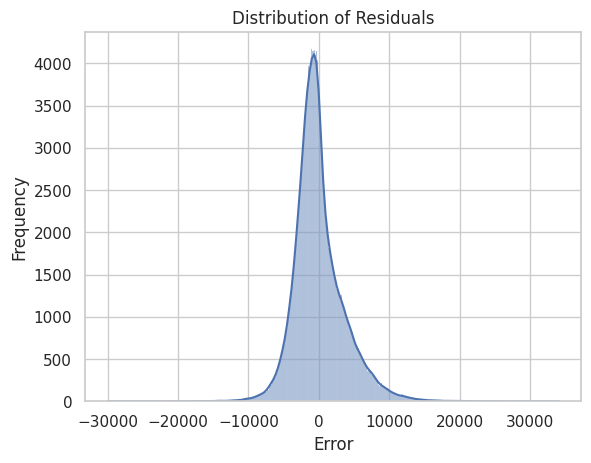

In [21]:
import seaborn as sns

# Assuming you have predictions and actuals
residuals = y_train - final_model.predict(X_train)
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.show()


In [21]:
import os

print("Current working directory:", os.getcwd())
model_path = os.path.join(os.getcwd(), 'models', 'final_rf_model.joblib')
print("Model path:", model_path)


Current working directory: /workspaces/ML-web-app-using-Flask/src
Model path: /workspaces/ML-web-app-using-Flask/src/models/final_rf_model.joblib
